# Leonardo Gracida Munoz A01379812
# Nancy L. García Jiménez A01378043
## Red neuronal detectora de senales de trafico
Link hacia dataset grande (DATASET) usada en drive:<br>
https://drive.google.com/drive/folders/1fA9DtcOlEPpT_WcOAAgDyHBUZyQvRG0R?usp=sharing<br>
Link hacia dataset pequena (dataset_red) usada en drive:<br>
https://drive.google.com/drive/folders/1-3hc9RzfkL2eOIG2YRX-q0-WGxtW_DMA?usp=sharing

Sitio original de la dataset:<br>
https://benchmark.ini.rub.de/gtsrb_news.html

Link hacia repositorio donde esta el codigo para poder clasificar imagenes:


In [ ]:
#Importamos la libreria de tensorflow que usa el gpu
!pip install tensorflow-gpu==2.4.0
#mostramos la targeta grafica a usar
!nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Sat May 28 15:18:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------

In [ ]:
#Importamos la dataset de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos todas las librerias necesarias a usar
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def myModel(inputShape,clases):
    """Funcion que crea el modelo de la red neuronal obteniendo los paramteros
    de el tamano de la imagen y el numero de clases a clasificar"""
    #Selección de hiperparamteros                                                                                                                                                                                                                                                                                                                                                                                                                          
    # Tamano de los filtros a usar en los Conv2D                                                                                                                                                                                   
    size_of_Filter=(5,5)                                                                                                                                                                                                         
    size_of_Filter2=(3,3)                                                                                                                                                                                                        
    # Tekes batches of 2x2 pixels and avg the  
    # Tamamos batches de 2x2 para disminuir la informacion obtenida del Conv2D                                                                                                                                                                                  
    size_of_pool=(2,2)                                                                                                                                                                                                           
    model = Sequential()
    model.add(Conv2D(60, size_of_Filter,input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(60, size_of_Filter))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Conv2D(30, size_of_Filter2))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(30, size_of_Filter2))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(300))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(300))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(clases))
    model.add(Activation("softmax"))
    return model
#Path de la carpeta donde se encuentra el DATASET a utilizar
path = "/content/drive/MyDrive/dataset_red/Train" #En caso de que quieras entrenar la deteccion de 6 senales diferentes
#path = "/content/drive/MyDrive/DATASETrain" #En caso de que quieras detectar 43 senales diferentes
print("Clases totales detectadas: ",len(myList))
clases = len(myList)
#Dimensiones de la imagen a usar
imageDimesions = (64,64,3)
#Creamos el modelo
model = myModel(imageDimesions,clases)
#Construimos el modelo
model.build()
#El tamano de lote a usar 
batch_size_val=16
#El numero de epochs s usar
epochs_val=75
testRatio = 0.2 #Proporcion de en cuanto vamos a dividir el DATASET el train y test
gamma = 1     #Factor de crecimiento de aprendizaje
learningRate = gamma * 1e-3
#Creamos un potimizador tipo Adam
cnnOptimizer = Adam(lr=learningRate, decay=learningRate / (epochs_val * 0.5))
#Compilamos el modelo
print("Compilando modelo...")
model.compile(loss="categorical_crossentropy", optimizer=cnnOptimizer, metrics=["accuracy"])
print("Modelo compilado")


Clases totales detectadas:  6
Compilando modelo...
Modelo compilado


In [66]:
def preprocessing(img):
  """Funcion que preporcesa la imagen a usar"""
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img/255
  return img

In [ ]:
#Esto lo corremos una vez para poder extraer el zip del dataset en drive
"""import zipfile
TMP_DATA_DIR = "/content/drive/MyDrive/dataset_red"
to_unpack = [
    ("/content/drive/MyDrive/Train_red.zip", TMP_DATA_DIR),

]
 
for file, directory in to_unpack:
    print("Unzipping {} to {}...".format(file, directory))
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(directory)"""

'import zipfile\nTMP_DATA_DIR = "/content/drive/MyDrive/dataset_red"\nto_unpack = [\n    ("/content/drive/MyDrive/Train_red.zip", TMP_DATA_DIR),\n\n]\n \nfor file, directory in to_unpack:\n    print("Unzipping {} to {}...".format(file, directory))\n    with zipfile.ZipFile(file,"r") as zip_ref:\n        zip_ref.extractall(directory)'

In [ ]:
#Extraemos las imagenes de la carpeta del dataset con cv2
count = 0
images = []
classNo = []
print("Importando Imagenes: ")
for i in myList:
    imageList = os.path.join(path,i)
    for j in os.listdir(imageList):
        imgPath = os.path.join(imageList,j)
        label = i
        curImg = cv2.imread(imgPath)
        #Le cambiamos el tamano a la imagen
        curImg = cv2.resize(curImg,(imageDimesions[1],imageDimesions[0]))
        #Preprocesamos la imagen
        curImg = preprocessing(curImg)
        images.append(curImg)
        classNo.append(int(i))
    print(count, end =" ")
    count +=1

Importando Imagenes: 
0 1 2 3 4 5 

In [ ]:
print("Numero de imagenes importadas: ",len(images))
images = np.array(images)
print("Dimensiones de las imgenes extraidas: ",images.shape)
classNo = np.array(classNo)

Numero de imagenes importadas:  3689
Dimensiones de las imgenes extraidas:  (3689, 64, 64, 3)


In [ ]:
#Dividimos la dataset en una parte para train y otr parte para test
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
#Cambismos los labels a modo categorical
y_test = to_categorical(y_test, clases)
y_train = to_categorical(y_train, clases)
print("Labels en modo categorical")
print(y_train.shape)
print(y_test.shape)
classTotal = y_train.sum(axis=0)
classWeight = classTotal.max() / classTotal
print("Proporcion de cada tipo de muestra en el dateset usado:")
print(classWeight)
classWeight = {i: classWeight[i] for i in range(len(classWeight))}

Labels en modo categorical
(2951, 6)
(738, 6)
Proporcion de cada tipo de muestra en el dateset usado:
[1.5566188 5.1368423 1.8175046 2.9575758 1.        3.353952 ]


In [ ]:
print("Resumen de modelo de la red neuronal:")
print(model.summary())

Resumen de modelo de la red neuronal:
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 60, 60, 60)        4560      
_________________________________________________________________
activation_42 (Activation)   (None, 60, 60, 60)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 60, 60, 60)        240       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 60)        90060     
_________________________________________________________________
activation_43 (Activation)   (None, 56, 56, 60)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 56, 56, 60)        240       
_________________________________________________________________
max_pooling2d_12

In [ ]:
#Generacion de ruido en las imagenes
dataGen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    fill_mode="nearest")

Epoch 1/75
184/184 [==============================] - 6s 25ms/step - loss: 2.9250 - accuracy: 0.4842 - val_loss: 7.4173 - val_accuracy: 0.0678
Epoch 2/75
184/184 [==============================] - 4s 24ms/step - loss: 1.4400 - accuracy: 0.7494 - val_loss: 0.3223 - val_accuracy: 0.8970
Epoch 3/75
184/184 [==============================] - 4s 23ms/step - loss: 0.7747 - accuracy: 0.8592 - val_loss: 0.1726 - val_accuracy: 0.9458
Epoch 4/75
184/184 [==============================] - 4s 24ms/step - loss: 0.6180 - accuracy: 0.8944 - val_loss: 0.1255 - val_accuracy: 0.9661
Epoch 5/75
184/184 [==============================] - 4s 24ms/step - loss: 0.4295 - accuracy: 0.9316 - val_loss: 0.1615 - val_accuracy: 0.9499
Epoch 6/75
184/184 [==============================] - 4s 24ms/step - loss: 0.4614 - accuracy: 0.9294 - val_loss: 0.0233 - val_accuracy: 0.9959
Epoch 7/75
184/184 [==============================] - 4s 24ms/step - loss: 0.2669 - accuracy: 0.9503 - val_loss: 0.4001 - val_accuracy: 0.8808

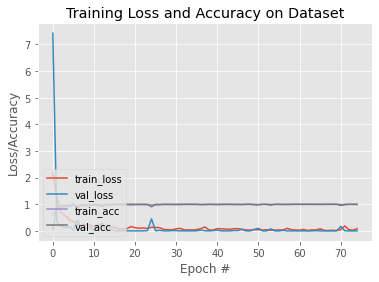

Comportamiento de accuracy y loss function guardado en: /content/drive/MyDrive/OUTPUT
Entrenamiento comletado


<Figure size 432x288 with 0 Axes>

In [ ]:
#Entrenamos el modelo
H = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),validation_data=(X_test, y_test),
          steps_per_epoch=X_train.shape[0] // batch_size_val,epochs=epochs_val,
          class_weight=classWeight,
          verbose=1)
#Salvamos el modelo
model.save('/content/drive/MyDrive/OUTPUT/signals_5_student.model')

plt.style.use("ggplot")
plt.figure()

#Guardamos el historial del modelo
N = np.arange(0, epochs_val)

#Ploteamos el comportamiento de la accuracy y loos function en el entrenamiento
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
#Guardamos el modelo
plt.savefig("/content/drive/MyDrive/OUTPUT")
print("Comportamiento de accuracy y loss function guardado en: "+"/content/drive/MyDrive/OUTPUT")
print("Entrenamiento comletado")